In [1]:
from cv2 import cv2
import matplotlib.pyplot as plt 
import numpy as np


img = cv2.imread('./images/objetos3.png') #imagem rgb
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #imagem monocromatica

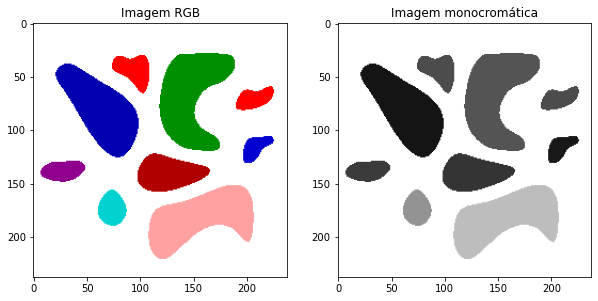

In [2]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem RGB')
plt.subplot(122)
plt.imshow(gray,cmap='gray', vmin=0, vmax=255)
plt.title('Imagem monocromática')

plt.show()

In [3]:
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
contours, hierarquia = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [4]:
fundo = np.ones(img.shape)
teste = cv2.drawContours(fundo, contours[1:], -1, (0,255,0), 3)

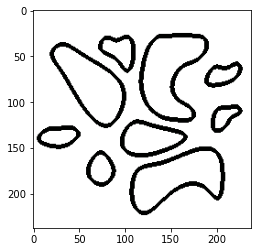

In [5]:
plt.imshow((teste * 255).astype(np.uint8))

In [8]:
aux = 0
areas = []
for contour in contours[1:]:
    
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    area = cv2.contourArea(contour)
    areas.append(area)
    print('região {}:  centroide: {}  perímetro: {:,.5f} área: {:,.5f}  '.format(aux, (cX, cY), cv2.arcLength(contour,True), area))
    

#     img = cv2.drawContours(img, contours[1:], -1, (0,255,0), 3)
    img= cv2.putText(img, str(aux), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0, 0, 0), 1)
    
    aux +=1

região 0:  centroide: (73, 173)  perímetro: 101.98275 área: 716.50000  
região 1:  centroide: (156, 182)  perímetro: 311.07821 área: 4,067.00000  
região 2:  centroide: (27, 137)  perímetro: 108.66905 área: 688.50000  
região 3:  centroide: (126, 140)  perímetro: 179.78174 área: 1,761.50000  
região 4:  centroide: (208, 116)  perímetro: 94.42641 área: 478.00000  
região 5:  centroide: (206, 70)  perímetro: 104.91169 área: 584.00000  
região 6:  centroide: (62, 80)  perímetro: 265.11984 área: 3,690.50000  
região 7:  centroide: (94, 43)  perímetro: 125.63961 área: 843.50000  
região 8:  centroide: (147, 68)  perímetro: 319.42135 área: 4,107.00000  


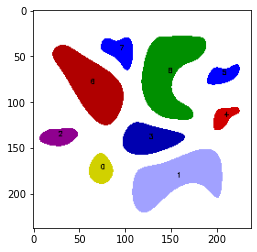

In [9]:
plt.imshow(img)

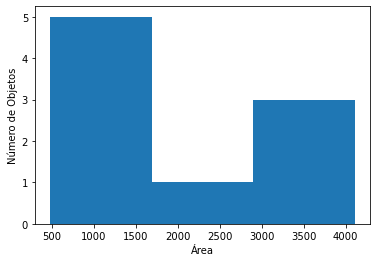

In [28]:
areas = np.array(areas)
plt.hist(areas, bins=3)
plt.xlabel("Área")
plt.ylabel("Número de Objetos")
plt.show()

In [27]:
print("número de regiões pequenas: {} \nnúmero de regiões médias: {} \nnúmero de regiões grandes: {}".format(len(areas[areas < 1500]), len(areas[(areas < 3000) & (areas >= 1500)]), len(areas[areas >= 3000])))

número de regiões pequenas: 5 
número de regiões médias: 1 
número de regiões grandes: 3
